## Завдання 1:

1. Згенеруйте двовимірні дані (𝑥, 𝑦) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої
(𝑦 = 𝑘x + 𝑏) для подальшого аналіз результатів

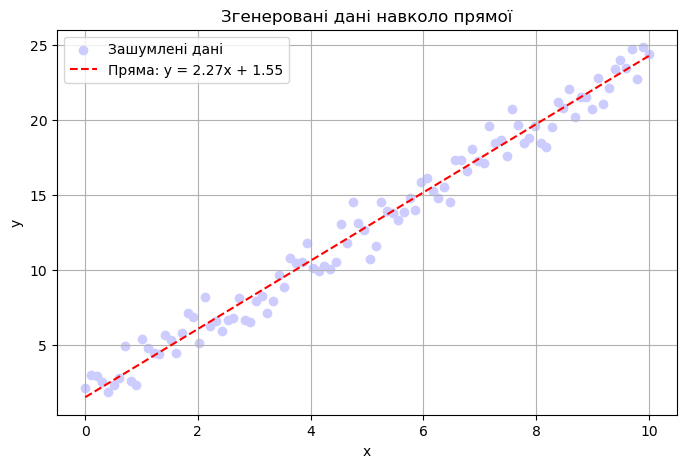

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Початкові параметри прямої
k = 2.27
b = 1.55

x = np.linspace(0, 10, 100)

noise = np.random.normal(0, 1, len(x))

y_without_noise = k * x + b

y = y_without_noise + noise

# Візуалізація
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Зашумлені дані', color = '#CCCCFF')
plt.plot(x, y_without_noise, 'r--', label=f'Пряма: y = {k}x + {b}')
plt.title('Згенеровані дані навколо прямої')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k^ та b^.

Метод найменших квадратів: k = 2.2445, b = 1.6235


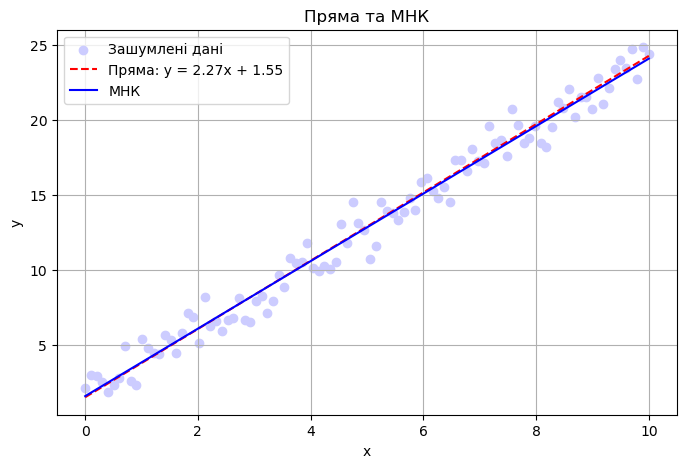

In [20]:
def least_squares(x, y):
    x_avg = np.mean(x)
    y_avg = np.mean(y)
    k = np.sum((x - x_avg) * (y - y_avg)) / np.sum((x - x_avg) ** 2)
    b = y_avg - k * x_avg
    return k, b

k_ls, b_ls = least_squares(x, y)
print(f"Метод найменших квадратів: k = {k_ls:.4f}, b = {b_ls:.4f}")

plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Зашумлені дані', color = '#CCCCFF')
plt.plot(x, y_without_noise, 'r--', label=f'Пряма: y = {k}x + {b}')
plt.plot(x, k_ls * x + b_ls, 'b-', label=f'МНК')
plt.title('Пряма та МНК')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [21]:
k_np, b_np = np.polyfit(x, y, 1)
print(f"Початкові параметри: k = {k}, b = {b}")
print(f"Метод найменших квадратів : k = {k_ls:.4f}, b = {b_ls:.4f}")
print(f"np.polyfit: k = {k_np:.4f}, b = {b_np:.4f}")


Початкові параметри: k = 2.27, b = 1.55
Метод найменших квадратів : k = 2.2445, b = 1.6235
np.polyfit: k = 2.2445, b = 1.6235


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

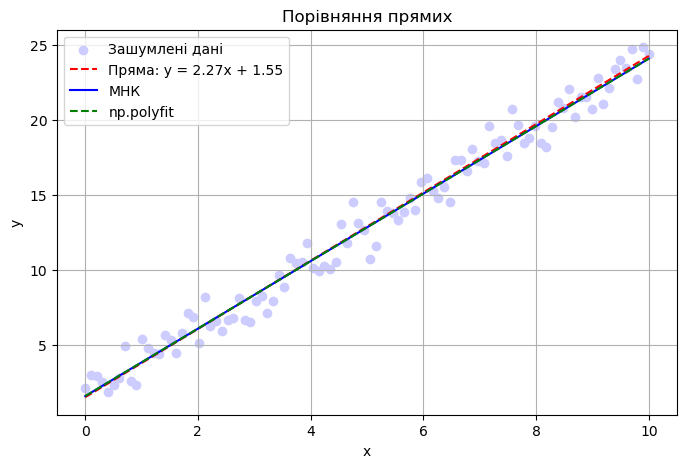

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Зашумлені дані', color = '#CCCCFF')
plt.plot(x, y_without_noise, 'r--', label=f'Пряма: y = {k}x + {b}')
plt.plot(x, k_ls * x + b_ls, 'b-', label=f'МНК')
plt.plot(x, k_np * x + b_np, 'g--', label="np.polyfit")
plt.title('Порівняння прямих')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Завдання 2

1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок 𝑘^ та 𝑏^. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [23]:
def gradient(x, y, learning_rate=0.01, n_iter=1000):
    k = 0  #нахил
    b = 0  #зсув
    errors = []

    for i in range(n_iter):
        y_pred = k * x + b
        error = np.mean((y - y_pred)**2)
        errors.append(error)

        # обчислення похідних
        dk = -2 * np.mean(x * (y - y_pred))
        db = -2 * np.mean(y - y_pred)

        # оновлення параметрів
        k -= learning_rate * dk
        b -= learning_rate * db

    return k, b, errors

# запуск функції
k_gd, b_gd, errors = gradient(x, y, learning_rate=0.01, n_iter=1000)
print(f"Градієнтний спуск: k = {k_gd:.4f}, b = {b_gd:.4f}")


Градієнтний спуск: k = 2.2458, b = 1.6149


2. Додайте отриману лінію регресії на загальний графік

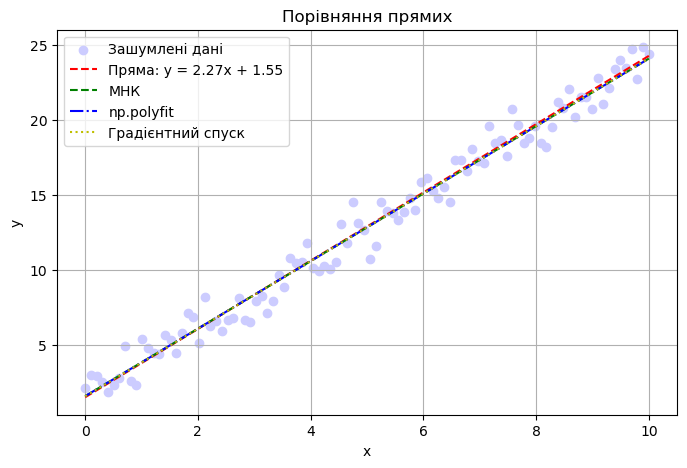

In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Зашумлені дані', color = '#CCCCFF')
plt.plot(x, y_without_noise, 'r--', label=f'Пряма: y = {k}x + {b}')
plt.plot(x, k_ls * x + b_ls, 'g--', label=f'МНК')
plt.plot(x, k_np * x + b_np, 'b-.', label="np.polyfit")
plt.plot(x, k_gd * x + b_gd, 'y:', label="Градієнтний спуск")
plt.title('Порівняння прямих')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

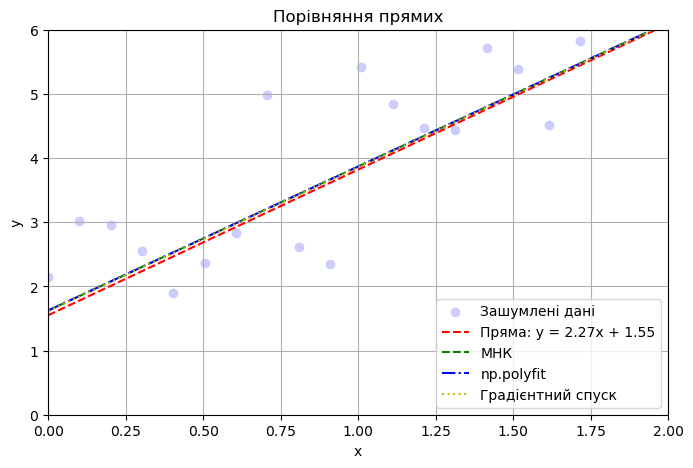

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Зашумлені дані', color = '#CCCCFF')
plt.plot(x, y_without_noise, 'r--', label=f'Пряма: y = {k}x + {b}')
plt.plot(x, k_ls * x + b_ls, 'g--', label=f'МНК')
plt.plot(x, k_np * x + b_np, 'b-.', label="np.polyfit")
plt.plot(x, k_gd * x + b_gd, 'y:', label="Градієнтний спуск")
plt.title('Порівняння прямих')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.xlim(0, 2)
plt.ylim(0, 6)
plt.show()


3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

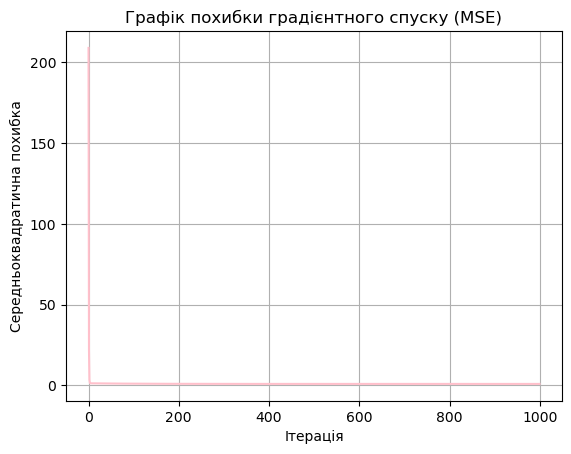

In [26]:
plt.plot(errors, color='pink')
plt.title("Графік похибки градієнтного спуску (MSE)")
plt.xlabel("Ітерація")
plt.ylabel("Середньоквадратична похибка")
plt.grid(True)
plt.show()


4. Порівняйте отримані результати з результатами попереднього завдання


In [27]:
print("Результати попереднього завдання")
print(f"Початкові параметри: k = {k}, b = {b}")
print(f"Метод найменших квадратів : k = {k_ls:.4f}, b = {b_ls:.4f}")
print(f"np.polyfit: k = {k_np:.4f}, b = {b_np:.4f}")
print("Результати даного завдання")
print(f"Градієнтний спуск: k = {k_gd:.4f}, b = {b_gd:.4f}")

Результати попереднього завдання
Початкові параметри: k = 2.27, b = 1.55
Метод найменших квадратів : k = 2.2445, b = 1.6235
np.polyfit: k = 2.2445, b = 1.6235
Результати даного завдання
Градієнтний спуск: k = 2.2458, b = 1.6149
